In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Pizza_Sales.csv")

In [ ]:
df.head(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,15/01/01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,15/01/01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,15/01/01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [ ]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [ ]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: Hour, dtype: Int64

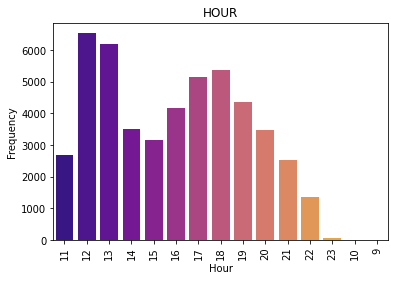

In [ ]:
sns.countplot(data=df,x="Hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("HOUR",color="black")
plt.show()

In [ ]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

2015    1844
2001    1782
2004    1773
2027    1763
2006    1673
2003    1660
2009    1656
2011    1655
2020    1650
2017    1649
2007    1647
2008    1646
2013    1643
2014    1643
2002    1624
2016    1609
2010    1601
2023    1595
2018    1589
2021    1560
2024    1546
2026    1504
2022    1484
2019    1463
2028    1450
2012    1443
2030    1439
2005    1427
2029    1361
2025    1245
2031     996
Name: order_year, dtype: int64

In [ ]:
df.pizza_id.value_counts()

big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: pizza_id, Length: 91, dtype: int64

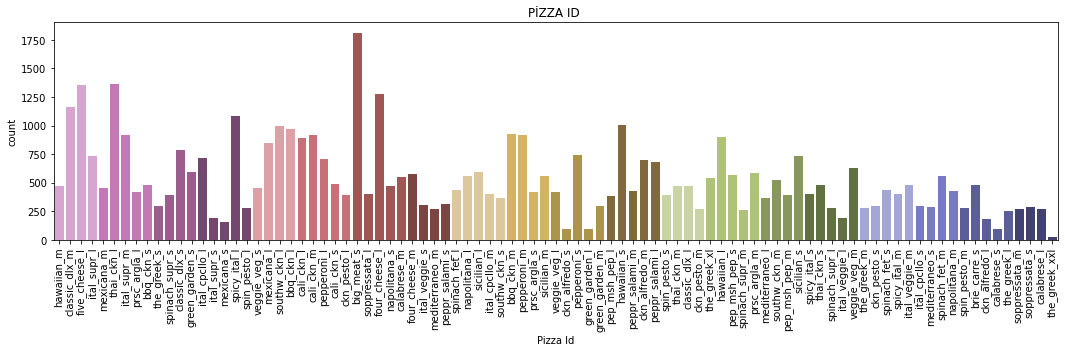

In [ ]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

In [ ]:
df.quantity.value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

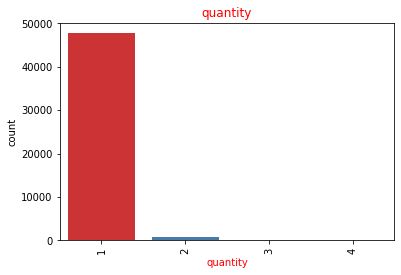

In [ ]:
sns.countplot(data=df,x="quantity",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("quantity",color="red")
plt.show()

In [ ]:
df.pizza_size.value_counts()

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

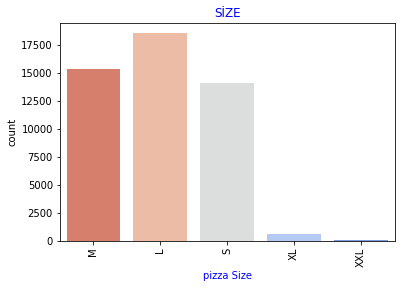

In [ ]:
sns.countplot(data=df,x="pizza_size",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("pizza Size",fontsize=10,color="b")
plt.title("SİZE",color="b")
plt.show()

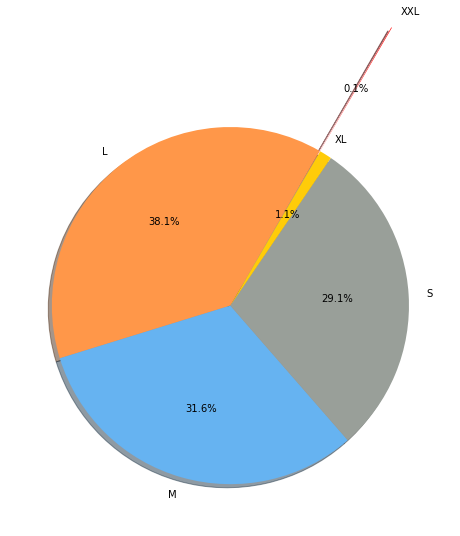

In [ ]:
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"RED","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

In [ ]:
df.pizza_category.value_counts()

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64

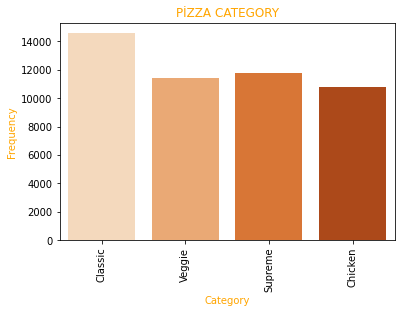

In [ ]:
sns.countplot(data=df,x="pizza_category",palette="Oranges")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("PİZZA CATEGORY",color="orange")
plt.show()

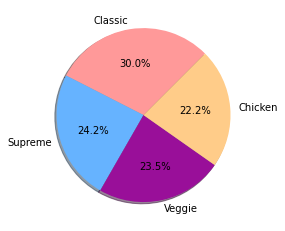

In [ ]:
labels = df["pizza_category"].value_counts().index
sizes = df["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

In [ ]:
  import plotly.express as px
  z=df['pizza_category'].value_counts()
  fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
  fig.show()
  fig=px.pie(z,names=z.index,values=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2')
  fig.show()